In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-rate-and-unemployment-rate-by-state/crimebystatecombinedwithunemployment.csv


In [27]:
#Import BigQuery 
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

Using Kaggle's public dataset BigQuery integration.


In [28]:
# Construct a reference to the first dataset "covid19_nyt"
dataset_ref = client.dataset("london_crime", project="bigquery-public-data")
#london = bq_helper.BigQueryHelper(active_project="bigquery-public-data",dataset_name="london_crime")

#dataset = pd.read_csv("/kaggle/input/crime-rate-and-unemployment-rate-by-state/crimebystatecombinedwithunemployment.csv")
# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# List all the tables in the "covid19_nyt" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset
for table in tables:  
    print(table.table_id)

crime_by_lsoa


In [29]:
# Construct a reference to the "us_counties" table
table_ref = dataset_ref.table("crime_by_lsoa")

# API request - fetch the table
table = client.get_table(table_ref)


# Preview the first five rows of the "us_counties" table
client.list_rows(table, max_results=10).to_dataframe()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01032740,City of London,Violence Against the Person,Harassment,0,2016,11
1,E01000005,City of London,Violence Against the Person,Harassment,0,2011,3
2,E01032739,City of London,Violence Against the Person,Harassment,0,2016,12
3,E01000005,City of London,Violence Against the Person,Harassment,0,2011,11
4,E01000005,City of London,Violence Against the Person,Harassment,0,2014,3
5,E01000002,City of London,Violence Against the Person,Harassment,0,2011,5
6,E01000005,City of London,Violence Against the Person,Harassment,0,2011,8
7,E01000005,City of London,Violence Against the Person,Harassment,0,2013,3
8,E01032740,City of London,Violence Against the Person,Harassment,0,2009,11
9,E01032739,City of London,Violence Against the Person,Harassment,0,2008,1


In [32]:


query1 = """
                SELECT borough , minor_category, month

                FROM `bigquery-public-data.london_crime.crime_by_lsoa`
                """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
safe_query_job = client.query(query1, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
lcrime = safe_query_job.to_dataframe()

# Print the first ten rows of the DataFrame
lcrime.head(10)

,borough,minor_category,month
0,Kensington and Chelsea,Theft From Motor Vehicle,8
1,Kensington and Chelsea,Theft From Motor Vehicle,3
2,Kensington and Chelsea,Theft From Motor Vehicle,4
3,Kensington and Chelsea,Theft From Motor Vehicle,6
4,Kensington and Chelsea,Theft From Motor Vehicle,2
5,Kensington and Chelsea,Theft From Motor Vehicle,11
6,Kensington and Chelsea,Theft From Motor Vehicle,2
7,Kensington and Chelsea,Theft From Motor Vehicle,1
8,Kensington and Chelsea,Theft From Motor Vehicle,4
9,Kensington and Chelsea,Theft From Motor Vehicle,7


In [33]:
query1 = """
                SELECT *,
                FROM `bigquery-public-data.london_crime.crime_by_lsoa`
                where major_category = 'Violence Against the Person'

                """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
safe_query_job = client.query(query1, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
lcrime = safe_query_job.to_dataframe()

# Print the first ten rows of the DataFrame
lcrime.head(100)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01000002,City of London,Violence Against the Person,Harassment,0,2011,9
1,E01000005,City of London,Violence Against the Person,Harassment,0,2014,7
2,E01000001,City of London,Violence Against the Person,Harassment,0,2008,3
3,E01032739,City of London,Violence Against the Person,Harassment,0,2016,3
4,E01000001,City of London,Violence Against the Person,Harassment,0,2011,10
...,...,...,...,...,...,...,...
95,E01032740,City of London,Violence Against the Person,Harassment,0,2014,8
96,E01032739,City of London,Violence Against the Person,Wounding/GBH,0,2008,12
97,E01032739,City of London,Violence Against the Person,Wounding/GBH,0,2009,11
98,E01000001,City of London,Violence Against the Person,Wounding/GBH,0,2013,6


In [34]:
query2 = """
           SELECT *,
               case 
              when month in (12, 1, 2) then 'winter'
               when month in (3, 4, 5) then 'spring'
               when month in (6, 7, 8) then 'summer'
               when month in (9, 10, 11) then 'autumn'
               end as season
                FROM `bigquery-public-data.london_crime.crime_by_lsoa`
               

           """
#,borough,minor_category
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
safe_query_job = client.query(query2, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
lcrime = safe_query_job.to_dataframe()

# Print the first ten rows of the DataFrame
lcrime.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month,season
0,E01000110,Barking and Dagenham,Drugs,Drug Trafficking,0,2010,5,spring
1,E01000018,Barking and Dagenham,Drugs,Drug Trafficking,0,2015,9,autumn
2,E01000045,Barking and Dagenham,Drugs,Drug Trafficking,0,2011,11,autumn
3,E01000108,Barking and Dagenham,Drugs,Drug Trafficking,0,2013,11,autumn
4,E01000095,Barking and Dagenham,Drugs,Drug Trafficking,0,2014,11,autumn
5,E01000051,Barking and Dagenham,Drugs,Drug Trafficking,0,2015,6,summer
6,E01000010,Barking and Dagenham,Drugs,Drug Trafficking,0,2012,11,autumn
7,E01000078,Barking and Dagenham,Drugs,Drug Trafficking,0,2009,2,winter
8,E01000043,Barking and Dagenham,Drugs,Drug Trafficking,0,2014,3,spring
9,E01000028,Barking and Dagenham,Drugs,Drug Trafficking,0,2008,10,autumn


In [35]:
query3 = """
           SELECT *,
               case 
               when month in (12, 1, 2) then 'winter'
               when month in (3, 4, 5) then 'spring'
               when month in (6, 7, 8) then 'summer'
               when month in (9, 10, 11) then 'autumn'
               end as season
                FROM `bigquery-public-data.london_crime.crime_by_lsoa`
               where major_category = 'Violence Against the Person'


           """
# and major_category = Violence Against the Person

#,borough,minor_category
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
safe_query_job = client.query(query3, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
lcrime = safe_query_job.to_dataframe()

# Print the first ten rows of the DataFrame
lcrime.head(50)

,lsoa_code,borough,major_category,minor_category,value,year,month,season
0,E01000001,City of London,Violence Against the Person,Harassment,0,2011,1,winter
1,E01000002,City of London,Violence Against the Person,Harassment,0,2016,1,winter
2,E01032739,City of London,Violence Against the Person,Harassment,0,2011,1,winter
3,E01000001,City of London,Violence Against the Person,Harassment,0,2009,1,winter
4,E01000001,City of London,Violence Against the Person,Harassment,0,2014,1,winter
5,E01000005,City of London,Violence Against the Person,Harassment,0,2009,1,winter
6,E01000003,City of London,Violence Against the Person,Wounding/GBH,0,2016,1,winter
7,E01032739,City of London,Violence Against the Person,Wounding/GBH,1,2015,1,winter
8,E01000005,City of London,Violence Against the Person,Wounding/GBH,0,2013,1,winter
9,E01032739,City of London,Violence Against the Person,Wounding/GBH,0,2011,1,winter


In [36]:
query3 = """
           SELECT major_category ,
               case 
               when month in (12, 1, 2) then 'winter'
               when month in (3, 4, 5) then 'spring'
               when month in (6, 7, 8) then 'summer'
               when month in (9, 10, 11) then 'autumn'
               end as season 
                FROM `bigquery-public-data.london_crime.crime_by_lsoa`
               where major_category = 'Violence Against the Person'


           """
# and major_category = Violence Against the Person

#,borough,minor_category
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
safe_query_job = client.query(query3, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
lcrime = safe_query_job.to_dataframe()

# Print the first ten rows of the DataFrame
lcrime.head(50)

,major_category,season
0,Violence Against the Person,autumn
1,Violence Against the Person,autumn
2,Violence Against the Person,autumn
3,Violence Against the Person,autumn
4,Violence Against the Person,autumn
5,Violence Against the Person,autumn
6,Violence Against the Person,autumn
7,Violence Against the Person,autumn
8,Violence Against the Person,autumn
9,Violence Against the Person,autumn


In [37]:
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import numpy as np
import pandas as pd  
import seaborn as sns
plt.close('all')


KeyError: 'sesaon'

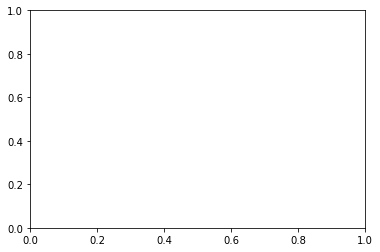

In [39]:
lcrime.plot.scatter(x='season', y='major_category', title='robbery by season')
plt.show()

In [ ]:
#%matplotlib inline
#DataFrame.plot()
#lcrime.plot(kind="bar", x="season", y="minor_category")
#plt.show

In [ ]:
#lcrime.plot(kind="bar", x="month", y="minor_category")
#plt.show